Statistics for industry code: 445
Minimum Wages: $    0.00
Maximum Wages: $123768781.00
Median: 82492720.00
Standard Deviation: 82492720.00
Mean: 82492720.00
Average: 82492720.00
Wages recieved sorted from latest to oldest over the period of years:
 [2021 2021 2020 2020 2019 2019 2018 2018 2017] 

Statistics for industry code: 311
Minimum Wages: $48694078.00
Maximum Wages: $243139127.00
Median: 65712897.50
Standard Deviation: 65712897.50
Mean: 65712897.50
Average: 65712897.50
Wages recieved sorted from latest to oldest over the period of years:
 [2021 2021 2020 2020 2019 2019 2018 2018 2017] 

Statistics for industry code: 722
Minimum Wages: $104701935.00
Maximum Wages: $376367578.00
Median: 174294090.00
Standard Deviation: 174294090.00
Mean: 174294090.00
Average: 174294090.00
Wages recieved sorted from latest to oldest over the period of years:
 [2021 2021 2020 2020 2019 2019 2018 2018 2017] 



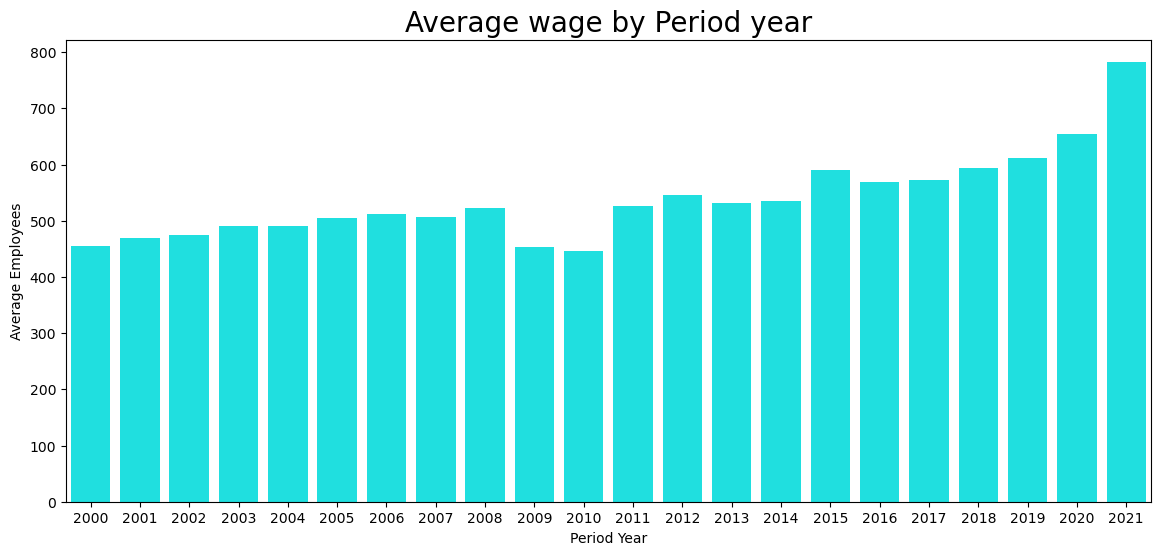

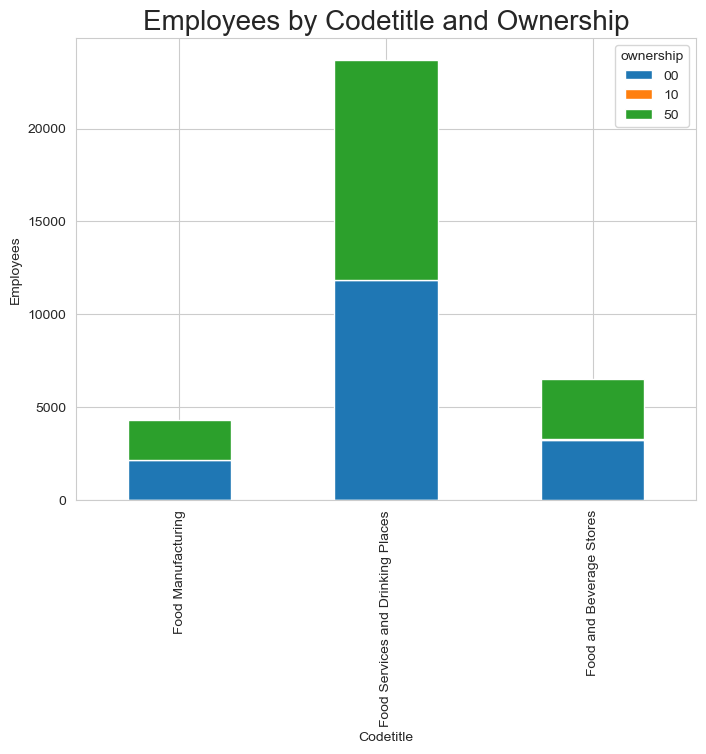

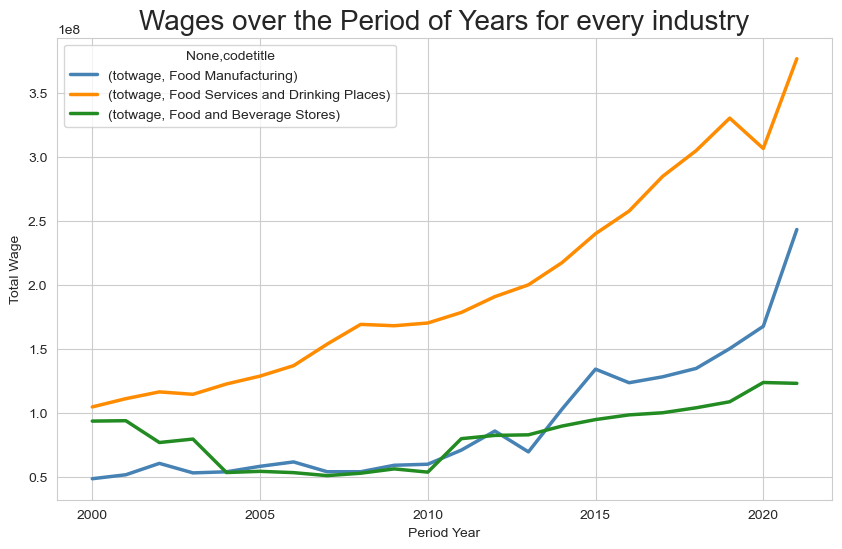

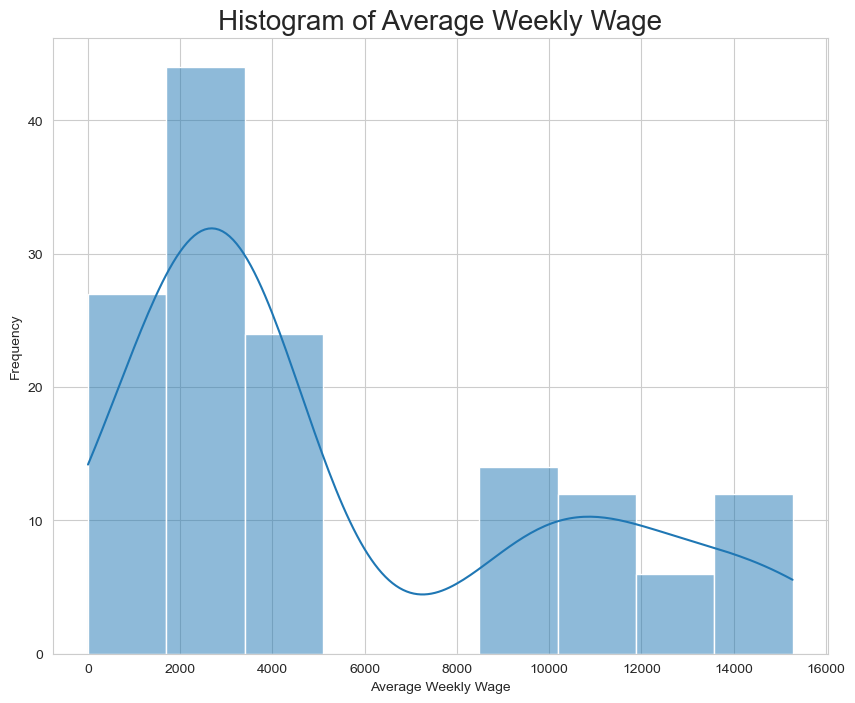

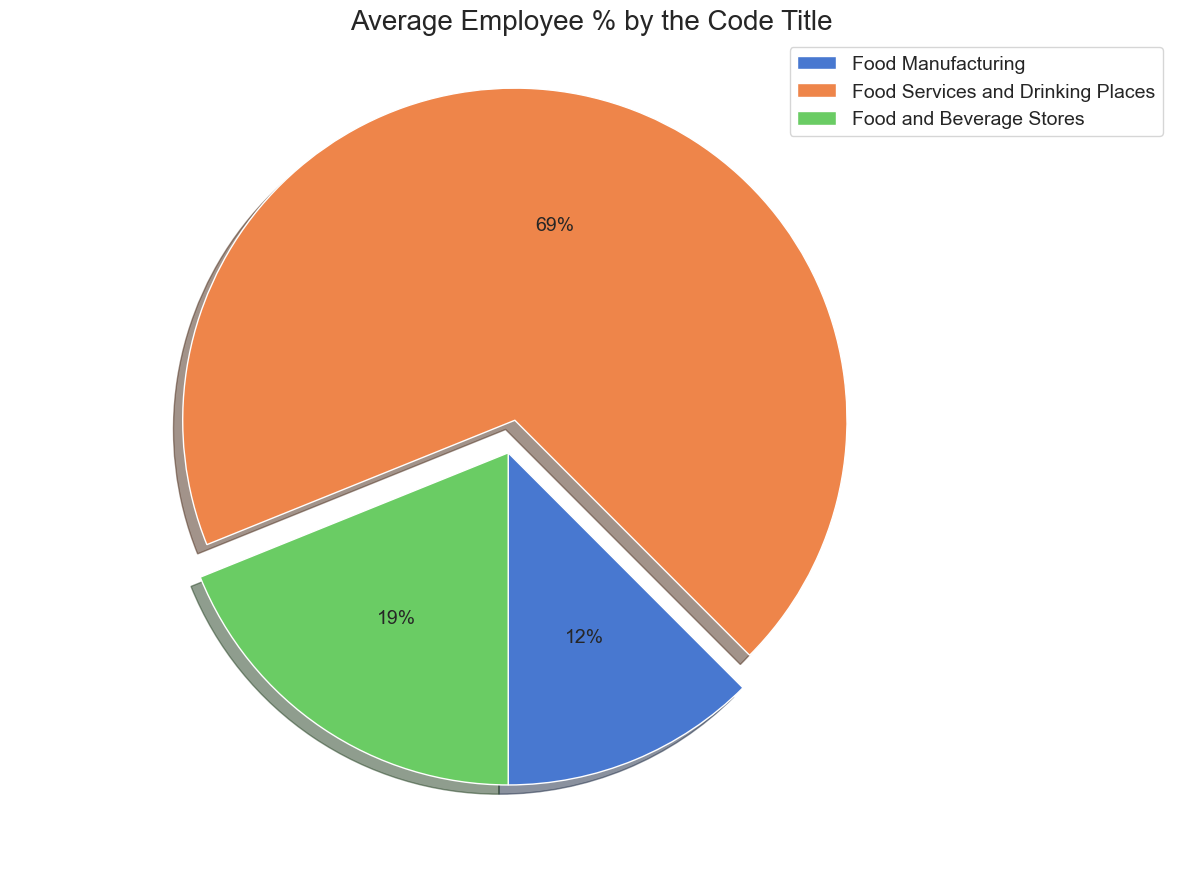

In [1]:
'''
Author: Aniket Patil
'''
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

indcode_list = [445, 311, 722]

# Connection to SQLite DB.
conn = sqlite3.connect('FoodDb.sqlite')
cur = conn.cursor()

# Creating dictionaries and lists to hold the data in for visualization
datadict = dict()
periodyearlist = list()
indcodelist = list()
codetitlelist = list()
ownershiplist = list()
establist = list()
avgemplist = list()
totwagelist = list()
avgwkwagelist = list()

# Select Query to Implement
for code in indcode_list:
    cur.execute('''SELECT periodyear, indcode, codetitle, ownership, estab, avgemp, totwage, avgwkwage FROM FoodDb WHERE ownership != 'Aggregate of all ownerships' and indcode = ? and totwage != 'NONE' order by periodyear, indcode''', (code,))
    for i in cur:
        periodyearlist.append(i[0])
        indcodelist.append(int(i[1]))
        codetitlelist.append(i[2])
        ownershiplist.append(i[3])
        establist.append(i[4])
        avgemplist.append(i[5])
        totwagelist.append(i[6])
        avgwkwagelist.append(i[7])
# Creating a dictionary
datadict["periodyear"] = periodyearlist
datadict["indcode"] = indcodelist
datadict["codetitle"] = codetitlelist
datadict["ownership"] = ownershiplist
datadict["estab"] = establist
datadict["avgemp"] = avgemplist
datadict["totwage"] = totwagelist
datadict["avgwkwage"] = avgwkwagelist


# Assigning the arrays to numpy
npperiodyearlist = np.array(periodyearlist)
npindcodelist = np.array(indcodelist)
npcodetitlelist = np.array(codetitlelist)
npownershiplist = np.array(ownershiplist)
npestablist = np.array(establist)
npavgemplist = np.array(avgemplist)
nptotwagelist = np.array(totwagelist)
npavgwkwagelist = np.array(avgwkwagelist)




df = pd.DataFrame(datadict)
#A loop to go through all the indcodes and provide respective o/p
for ids in indcode_list:
    idfilter = npindcodelist == int(ids)
    # Select the total wage values for the current industry code using the filter
    incamtfilter = nptotwagelist[idfilter]

    # Print statistics for the current industry code
    print("Statistics for industry code:", ids)

    # If there is data for the current industry code
    if len(incamtfilter) > 0:
        # Print the minimum and maximum Wages
        print("Minimum Wages: ${0:8.2f}\nMaximum Wages: ${1:8.2f}".format(np.amin(incamtfilter), np.amax(incamtfilter)))

        # Print the median, mean, standard deviation, and average of the Wages
        print("Median: {0:8.2f}\nStandard Deviation: {0:8.2f}\nMean: {0:8.2f}\nAverage: {0:8.2f}".format(np.median(
            incamtfilter), np.std(incamtfilter), np.mean(incamtfilter), np.average(incamtfilter)))

        # Select the period year values for the current industry code using the filter
        increvddate = npperiodyearlist[idfilter]

        # Sort the period year
        sortfilter = np.argsort(increvddate)
        wagerecvdarraysorted = increvddate[sortfilter]
        print("Wages recieved sorted from latest to oldest over the period of years:\n", np.flip(wagerecvdarraysorted[wagerecvdarraysorted.size-9:]), "\n")

    # If there is no data for the current industry code
    else:
        print("No data for industry code ", ids)


'''
Bar Graph
A bar chart to visualize the average wage by industry or year.
'''
# create a pivot table with average employee as values and period year as index
table1 = pd.pivot_table(df, values=['avgwkwage'], index=['periodyear'])

# create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 6))

# create a bar plot with x-axis as period year, y-axis as average employee, and data as the pivot table
# set the color of the bars as 'steelblue'
ax = sns.barplot(x=table1.index, y='avgwkwage',data=table1, color='cyan')


# set the title, x-axis label, and y-axis label
plt.xlabel("Period Year")
plt.ylabel("Average Employees")
plt.title("Average wage by Period year", fontsize=20)

# save the plot as a PNG file with 300 DPI resolution and tight bounding box
plt.savefig("BarGraph.png", dpi=300, bbox_inches='tight')
plt.show()

'''
Stacked Bar Chart
A stacked bar chart to visualize the number of employees in each industry by industry ownership type.
'''
# create a pivot table of total avgemp by codetitle and ownership
table2 = df.pivot_table(values='avgemp', index='codetitle', columns='ownership')

# create a stacked bar chart using seaborn
sns.set_style("whitegrid")
ax = table2.plot(kind='bar', stacked=True, figsize=(8, 6))

# set the title, x-axis label, and y-axis label
plt.title("Employees by Codetitle and Ownership", fontsize=20)
plt.xlabel("Codetitle")
plt.ylabel("Employees")

# save the plot as a PNG file
plt.savefig("Stacked Bar.png", dpi=300, bbox_inches='tight')

# show the plot
plt.show()

'''
Line Chart
A line chart to show how the wages received for each industry changes over time.
'''
table3 = pd.pivot_table(df, values=['totwage'], index=['periodyear'], columns=['codetitle'])

# create a line plot of total wages over the period of years using pandas plot method
colors = ['steelblue', 'darkorange', 'forestgreen', 'purple']
table3.plot(figsize=(10, 6), linewidth=2.5, color=colors)

# set the title, x-axis label, and y-axis label
plt.title("Wages over the Period of Years for every industry", fontsize=20)
plt.xlabel("Period Year")
plt.ylabel("Total Wage")

# save the plot as a PNG file
plt.savefig("LineGraph.png", dpi=300, bbox_inches='tight')

# show the plot
plt.show()


'''
Histogram
'''
# create a histogram of petal lengths using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.histplot(df, x="avgemp", kde=True)

# set the title of the plot and the labels for the x and y axes
plt.title('Histogram of Average Weekly Wage', fontsize=20)
plt.xlabel('Average Weekly Wage')
plt.ylabel('Frequency')

# save the plot as a PNG file
plt.savefig("Histograph.png", dpi=300, bbox_inches='tight')

# show the plot
plt.show()

'''
Expansion on the assignment
Pie chart using Seaborn library
'''

# set color palette
colors = sns.color_palette('muted', n_colors=5)

# group data by codetitle and calculate sum of avgwkwage
data = df.groupby('codetitle')['avgemp'].sum()

# find index of the maximum value in data
max_index = data.idxmax()

# calculate explode values
explode = [0.1 if codetitle == max_index else 0 for codetitle in data.index]

# create pie chart
fig, ax = plt.subplots(figsize=(15, 12))
ax.pie(data, explode=explode, colors=colors, startangle=-90, shadow=True, autopct='%1.0f%%', textprops={'fontsize': 14})

# set title and legend
ax.set_title('Average Employee % by the Code Title', fontsize=20)
ax.legend(data.index, loc='upper right', fontsize=14)

# set limits and save the figure
ax.set_xlim(-1.5, 2.0)
plt.savefig('Piechart.png', bbox_inches='tight')

# display the chart
plt.show()

conn.close()